# Loading Appropriate Libraries and Data

## We are given training data and test data of passengers that travelled on the titanic.


In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(GGally)
library(caret)
library(plotly)
library(gridExtra)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input/titanic")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.3          ✔ dplyr   1.0.1     
✔ tidyr   1.1.1          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

  

[1] "gender_submission.csv" "test.csv"              "train.csv"

In [2]:
train_data = read_csv('../input/titanic/train.csv') %>%
    select(-c(Name,Ticket))
test_data = read_csv('../input/titanic/test.csv') %>%
    select(-c(Name,Ticket))

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)



In [3]:
head(train_data)

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0,3,male,22,1,0,7.2500,NA,S
2,1,1,female,38,1,0,71.2833,C85,C
3,1,3,female,26,0,0,7.9250,NA,S
4,1,1,female,35,1,0,53.1000,C123,S
5,0,3,male,35,0,0,8.0500,NA,S
6,0,3,male,NA,0,0,8.4583,NA,Q


In [4]:
head(test_data)

PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
892,3,male,34.5,0,0,7.8292,NA,Q
893,3,female,47.0,1,0,7.0000,NA,S
894,2,male,62.0,0,0,9.6875,NA,Q
895,3,male,27.0,0,0,8.6625,NA,S
896,3,female,22.0,1,1,12.2875,NA,S
897,3,male,14.0,0,0,9.2250,NA,S


# Preprocessing Data

Ticket Class, Age , Sec and Existence of Cabin info will be converted into a numererical quantity and standardized for analysis. We will not use the test data to create the scale tranformation.


In [5]:
# We must first create new columns in both the test and training data that converts categorical variables like sex into numbers
# We have also converted categorical variables into numerical quantites (Sex, Embarked Location, Existence of Cabin Data)

Processed_train_data = train_data %>%
    mutate(sex_n=ifelse(Sex=='female',0,1))%>% # male is 1 and female is 0
    mutate(Cabin_Data=ifelse(!is.na(Cabin),1,0))%>%
    mutate(Embarked_n=ifelse(Embarked=='Q',2,
                           ifelse(Embarked=='C',1,0)))%>%
    mutate(Survived = as.factor(Survived)) %>%
    filter(!is.na(Embarked_n))%>%
    filter(!is.na(sex_n))%>%
    filter(!is.na(Pclass))

Processed_test_data = test_data %>%
    mutate(sex_n=ifelse(Sex=='female',0,1))%>% # male is 1 and female is 0
    mutate(Cabin_Data=ifelse(!is.na(Cabin),1,0))%>%
    mutate(Embarked_n=ifelse(Embarked=='Q',2,
                           ifelse(Embarked=='C',1,0)))%>%
    mutate(Pclass = ifelse(is.na(Pclass),3,Pclass))
    
    

In [6]:
head(Processed_train_data)

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_n,Cabin_Data,Embarked_n
<dbl>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,0,3,male,22,1,0,7.2500,NA,S,1,0,0
2,1,1,female,38,1,0,71.2833,C85,C,0,1,1
3,1,3,female,26,0,0,7.9250,NA,S,0,0,0
4,1,1,female,35,1,0,53.1000,C123,S,0,1,0
5,0,3,male,35,0,0,8.0500,NA,S,1,0,0
6,0,3,male,NA,0,0,8.4583,NA,Q,1,0,2


In [7]:
head(Processed_test_data)

PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_n,Cabin_Data,Embarked_n
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
892,3,male,34.5,0,0,7.8292,NA,Q,1,0,2
893,3,female,47.0,1,0,7.0000,NA,S,0,0,0
894,2,male,62.0,0,0,9.6875,NA,Q,1,0,2
895,3,male,27.0,0,0,8.6625,NA,S,1,0,0
896,3,female,22.0,1,1,12.2875,NA,S,0,0,0
897,3,male,14.0,0,0,9.2250,NA,S,1,0,0


### I speculate that the ticket class, age, sex , Existence of Cabin info may play a role in determining the survival of the individual 

### I will create barplots to understand the number of survivors for all these relevant variables 


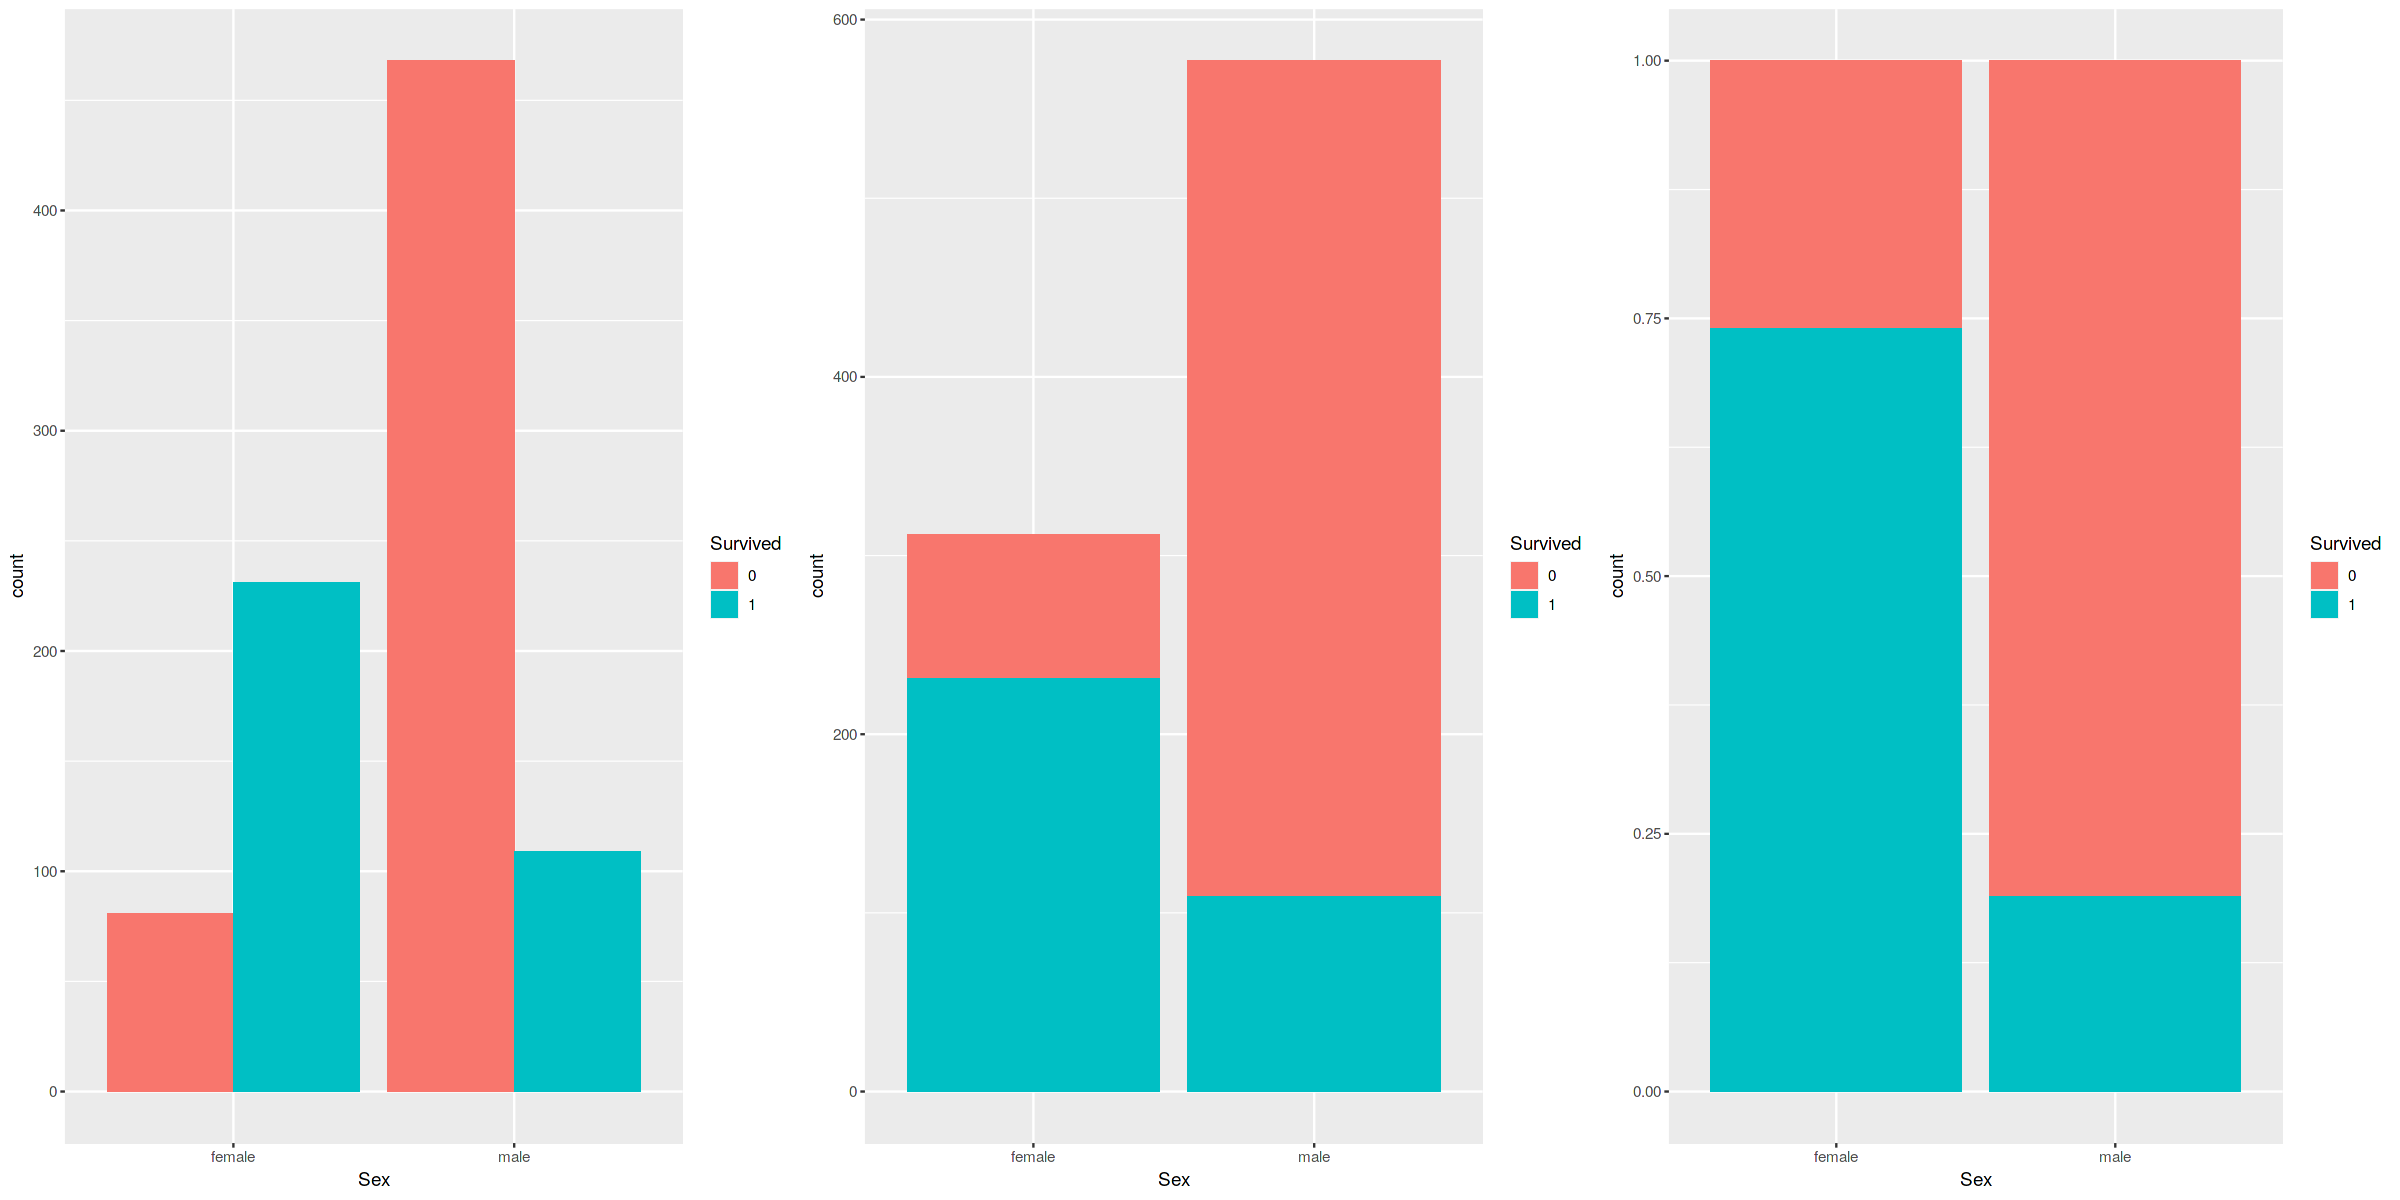

In [8]:
# Analysing the Survival Data according to Sex
bar_Sex = Processed_train_data %>%
    ggplot(aes(x=Sex,fill=factor(Survived)))+
    geom_bar(position='dodge')+
    labs(x='Sex',fill='Survived')

bar_Sex_Stacked = Processed_train_data %>%
    ggplot(aes(x=Sex,fill=factor(Survived)))+
    geom_bar(position='stack')+
    labs(x='Sex',fill='Survived')

bar_Sex_Ratio = Processed_train_data %>%
    ggplot(aes(x=Sex,fill=factor(Survived)))+
    geom_bar(position='fill')+
    labs(x='Sex',fill='Survived')

options(repr.plot.width=20,repr.plot.height=10)

grid.arrange(bar_Sex,bar_Sex_Stacked,bar_Sex_Ratio,ncol=3)
           

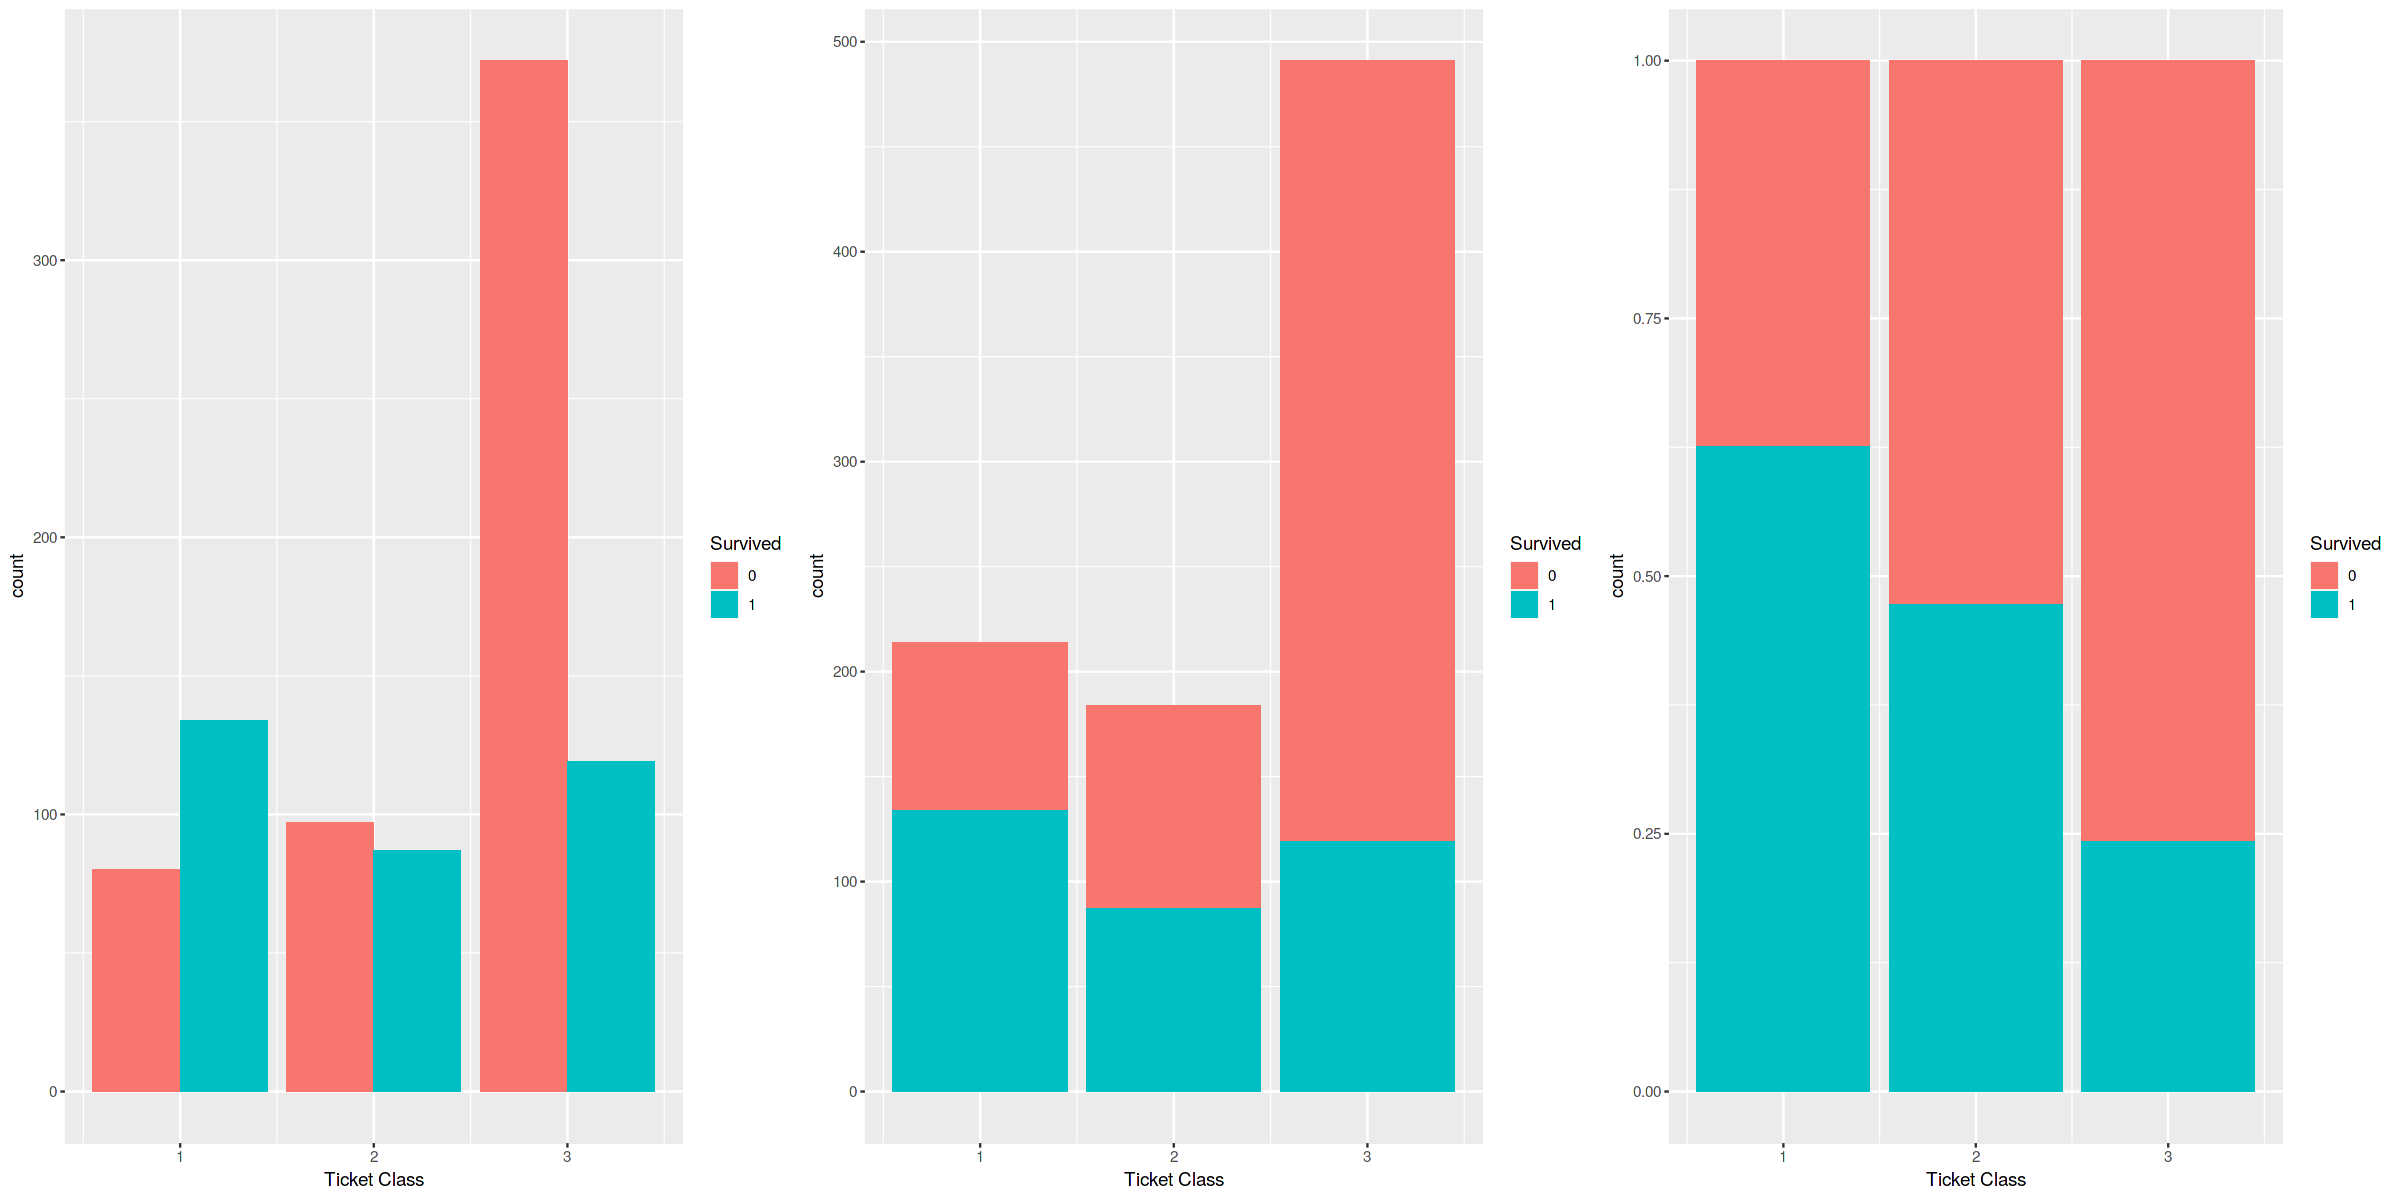

In [9]:
# Analysing the Survival Data according to Ticket Class
bar_Ticket = Processed_train_data %>%
    ggplot(aes(x=Pclass,fill=factor(Survived)))+
    geom_bar(position='dodge')+
    labs(x='Ticket Class',fill='Survived')

bar_Ticket_Stacked = Processed_train_data %>%
    ggplot(aes(x=Pclass,fill=factor(Survived)))+
    geom_bar(position='stack')+
    labs(x='Ticket Class',fill='Survived')

bar_Ticket_Ratio = Processed_train_data %>%
    ggplot(aes(x=Pclass,fill=factor(Survived)))+
    geom_bar(position='fill')+
    labs(x='Ticket Class',fill='Survived')

options(repr.plot.width=20,repr.plot.height=10)

grid.arrange(bar_Ticket,bar_Ticket_Stacked,bar_Ticket_Ratio,ncol=3)

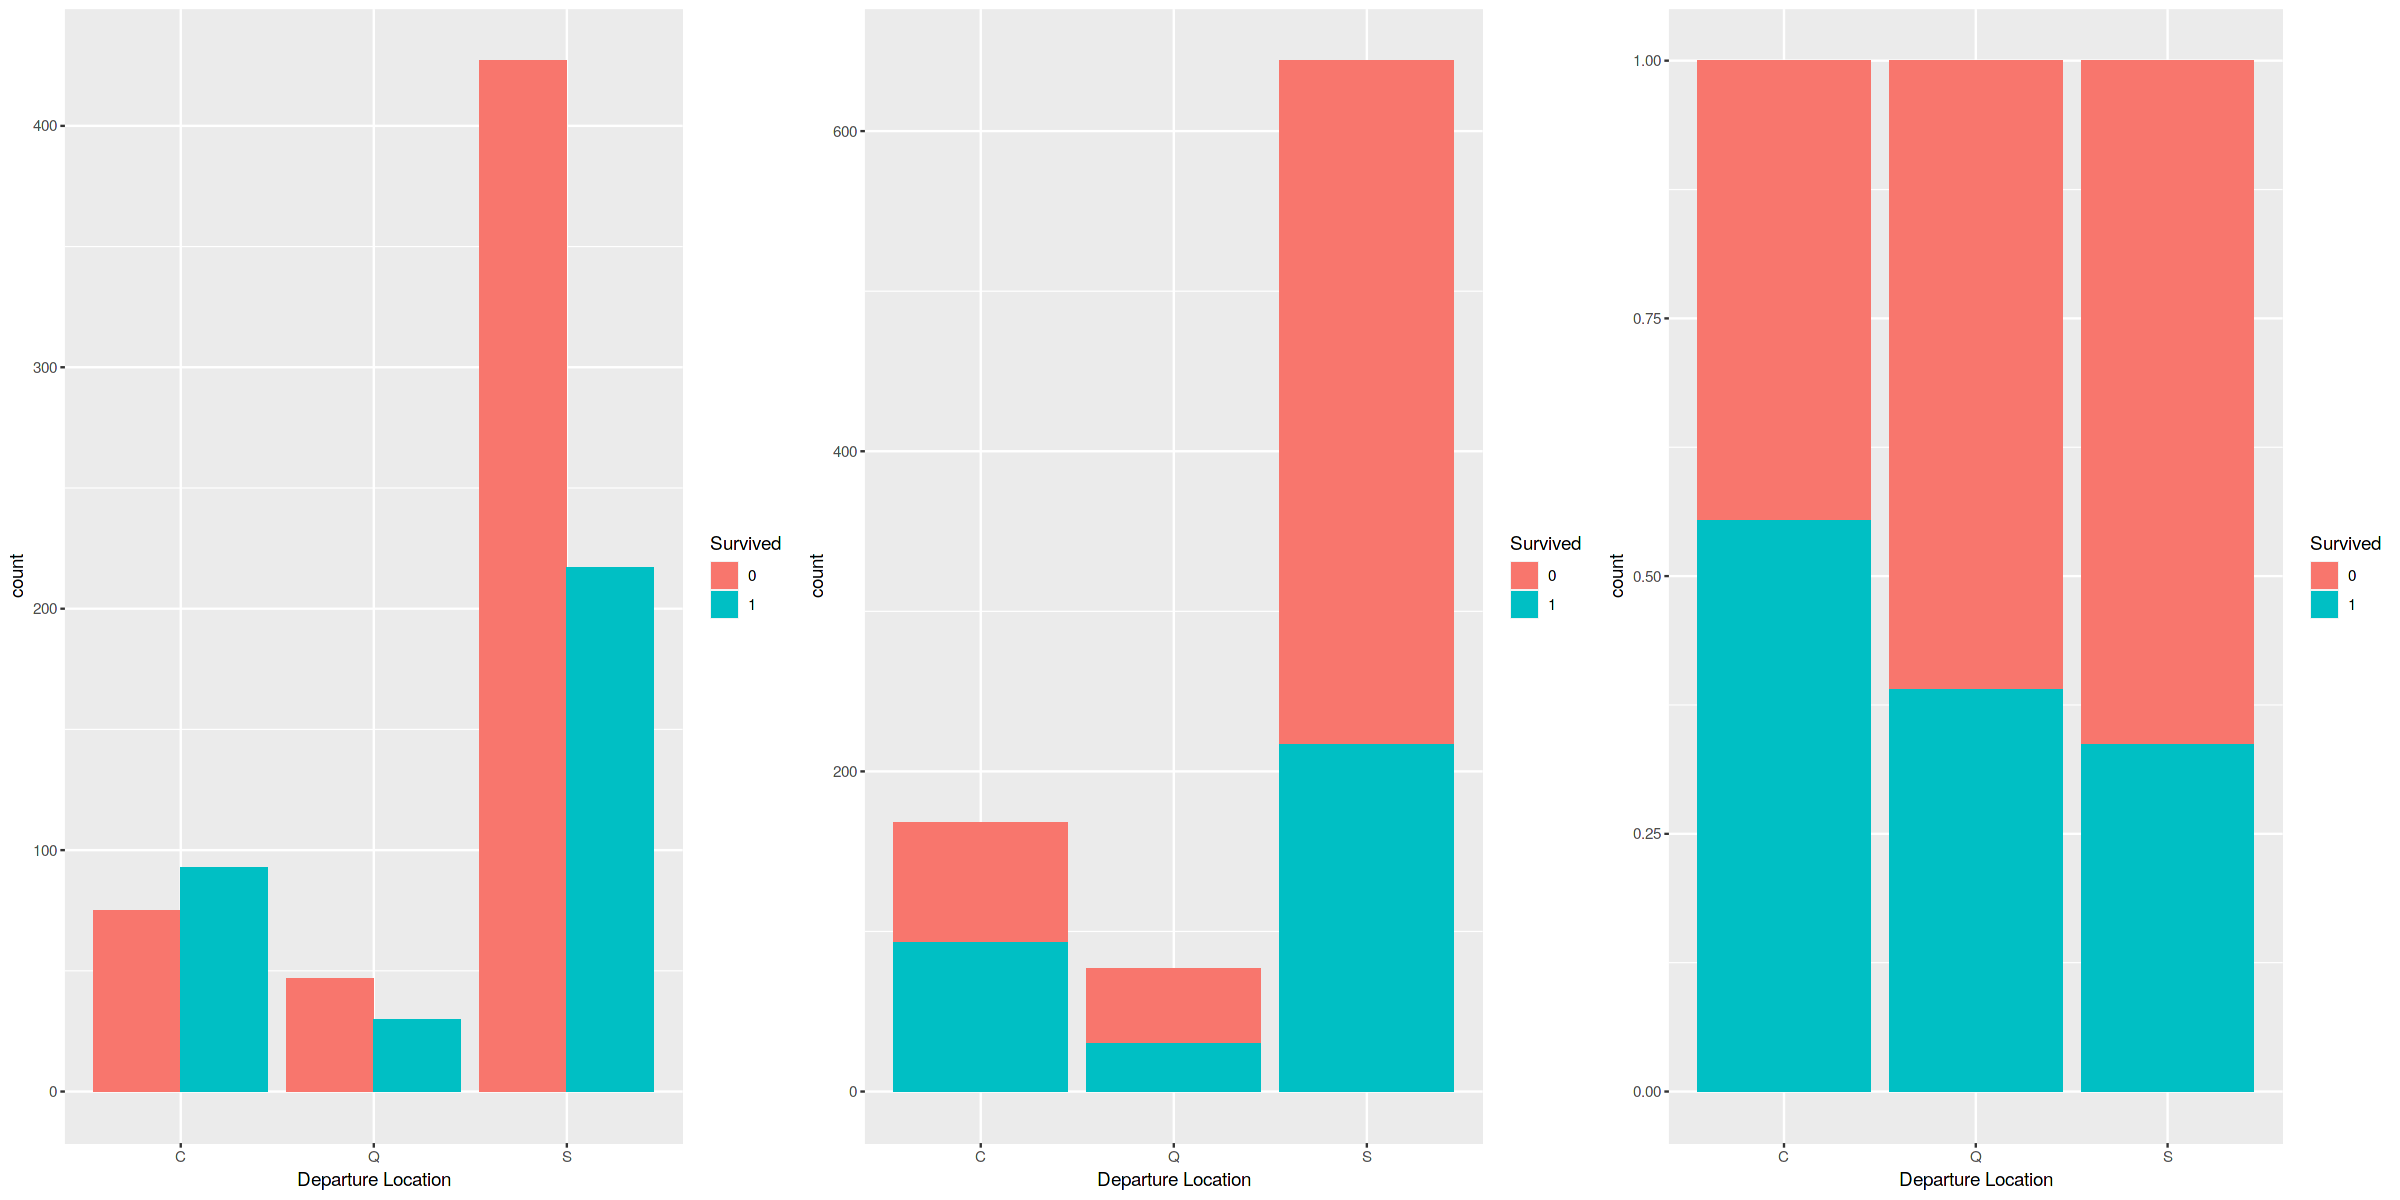

In [10]:
# Analysing Survival Data according to departure location
bar_Embarked = Processed_train_data %>%
    ggplot(aes(x=Embarked,fill=factor(Survived)))+
    geom_bar(position='dodge')+
    labs(x='Departure Location',fill='Survived')

bar_Embarked_Stacked = Processed_train_data %>%
    ggplot(aes(x=Embarked,fill=factor(Survived)))+
    geom_bar(position='stack')+
    labs(x='Departure Location',fill='Survived')

bar_Embarked_Ratio = Processed_train_data %>%
    ggplot(aes(x=Embarked,fill=factor(Survived)))+
    geom_bar(position='fill')+
    labs(x='Departure Location',fill='Survived')

options(repr.plot.width=20,repr.plot.height=10)

grid.arrange(bar_Embarked,bar_Embarked_Stacked,bar_Embarked_Ratio,ncol=3)

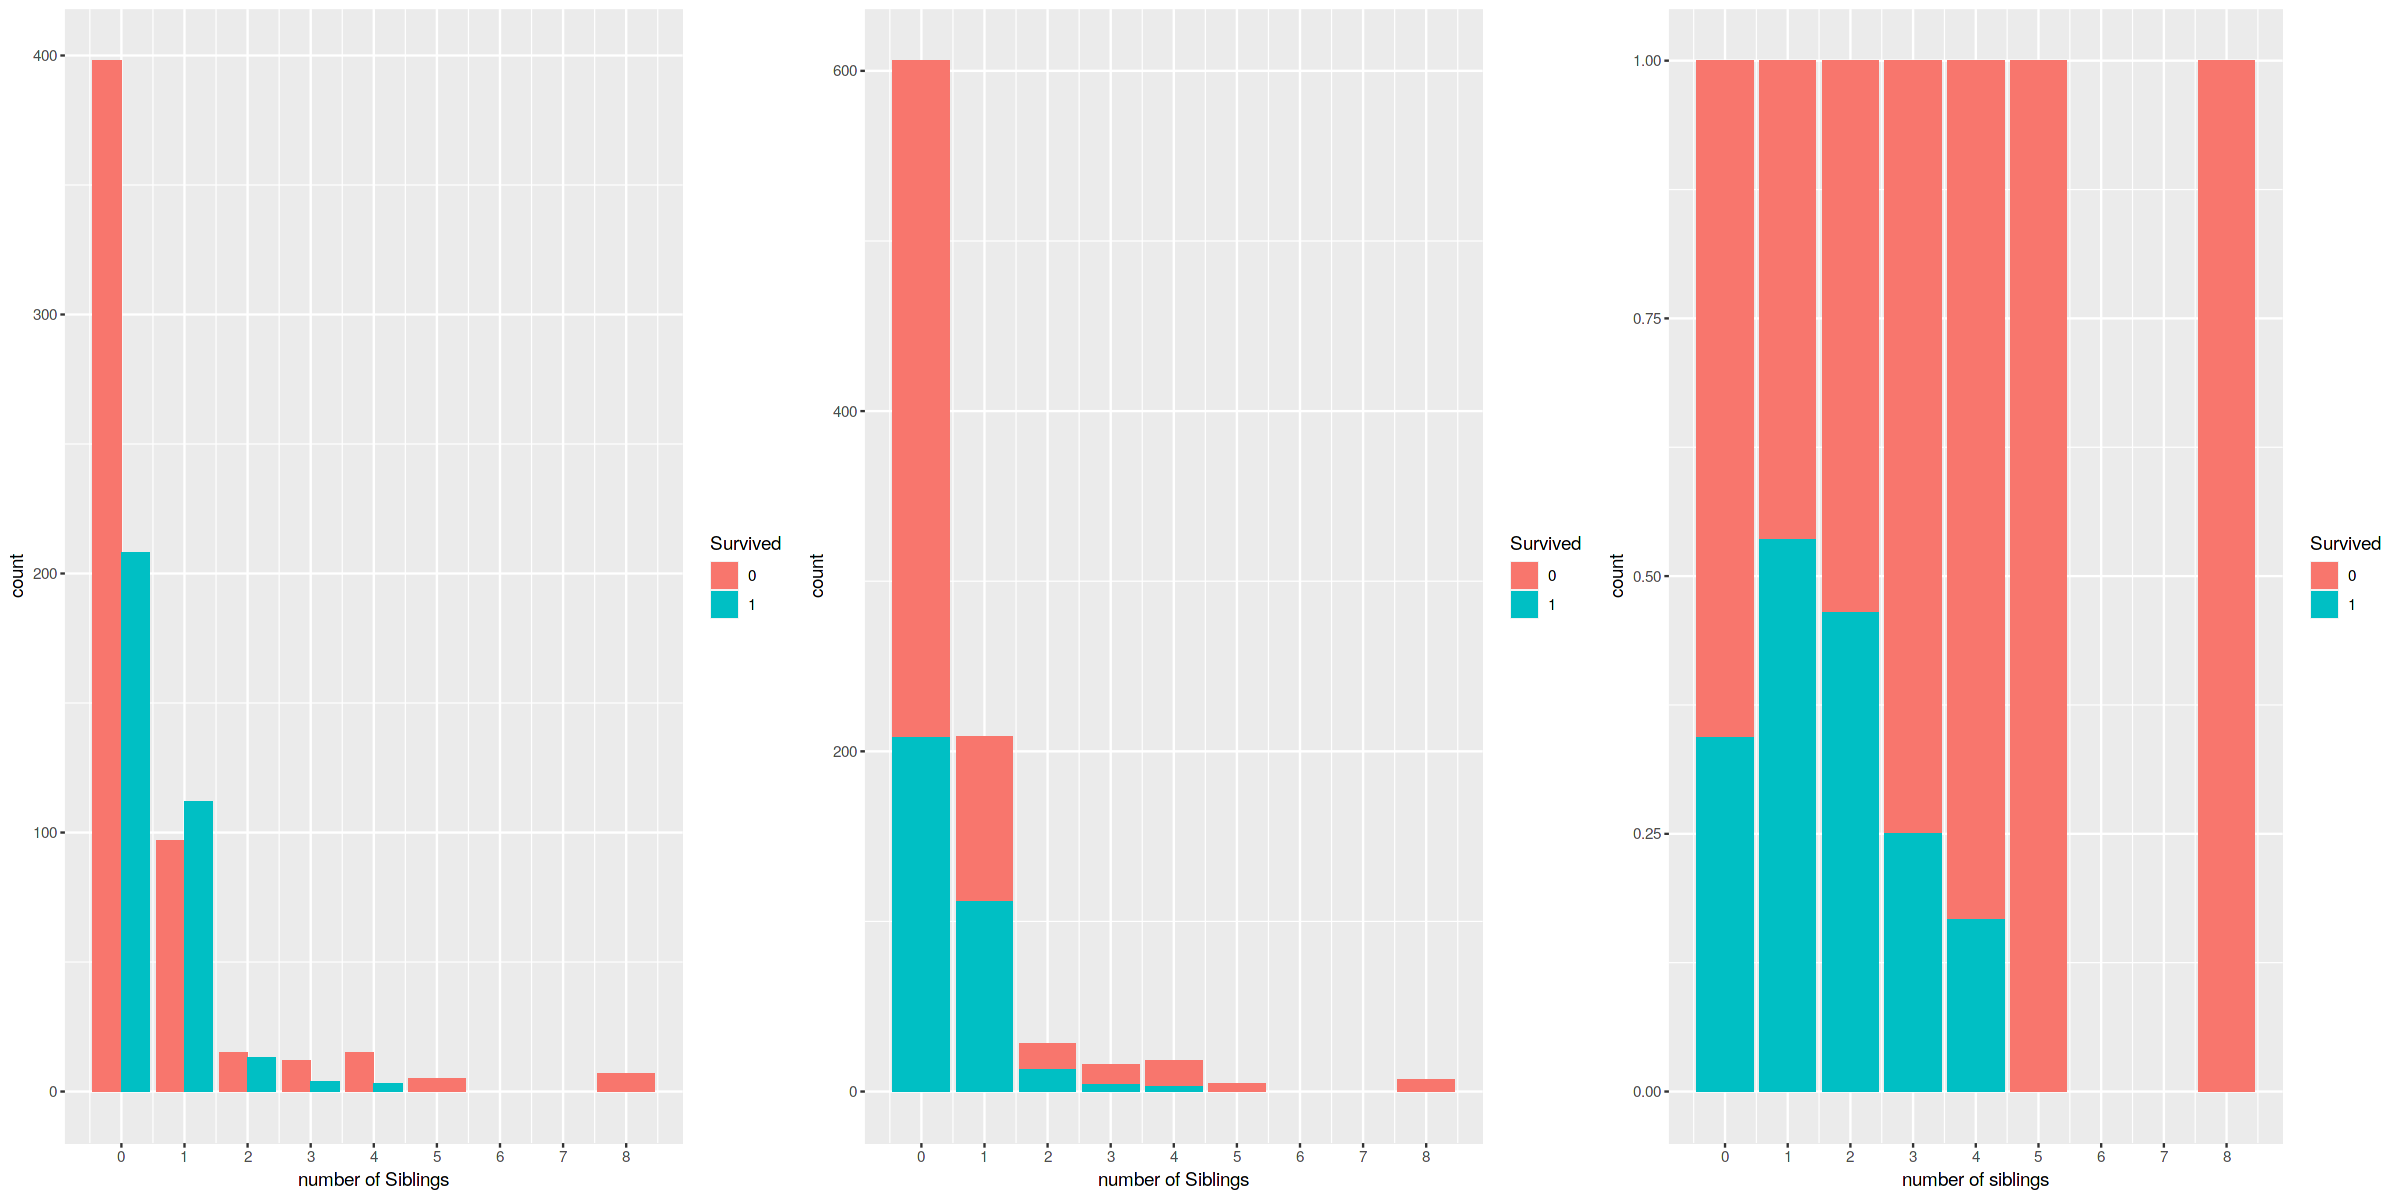

In [11]:
# Analysing Survival Data according to number of siblings aboard the ship
bar_Siblings = Processed_train_data %>%
    ggplot(aes(x=SibSp,fill=factor(Survived)))+
    geom_bar(position='dodge')+
    labs(x='number of Siblings',fill='Survived')+
    scale_x_continuous(breaks = 0:9)

bar_Siblings_Stacked = Processed_train_data %>%
    ggplot(aes(x=SibSp,fill=factor(Survived)))+
    geom_bar(position='stack')+
    labs(x='number of Siblings',fill='Survived')+
    scale_x_continuous(breaks = 0:9)

bar_Siblings_Ratio = Processed_train_data %>%
    ggplot(aes(x=SibSp,fill=factor(Survived)))+
    geom_bar(position='fill')+
    labs(x='number of siblings',fill='Survived')+
    scale_x_continuous(breaks = 0:9)

options(repr.plot.width=20,repr.plot.height=10)

grid.arrange(bar_Siblings,bar_Siblings_Stacked,bar_Siblings_Ratio,ncol=3)

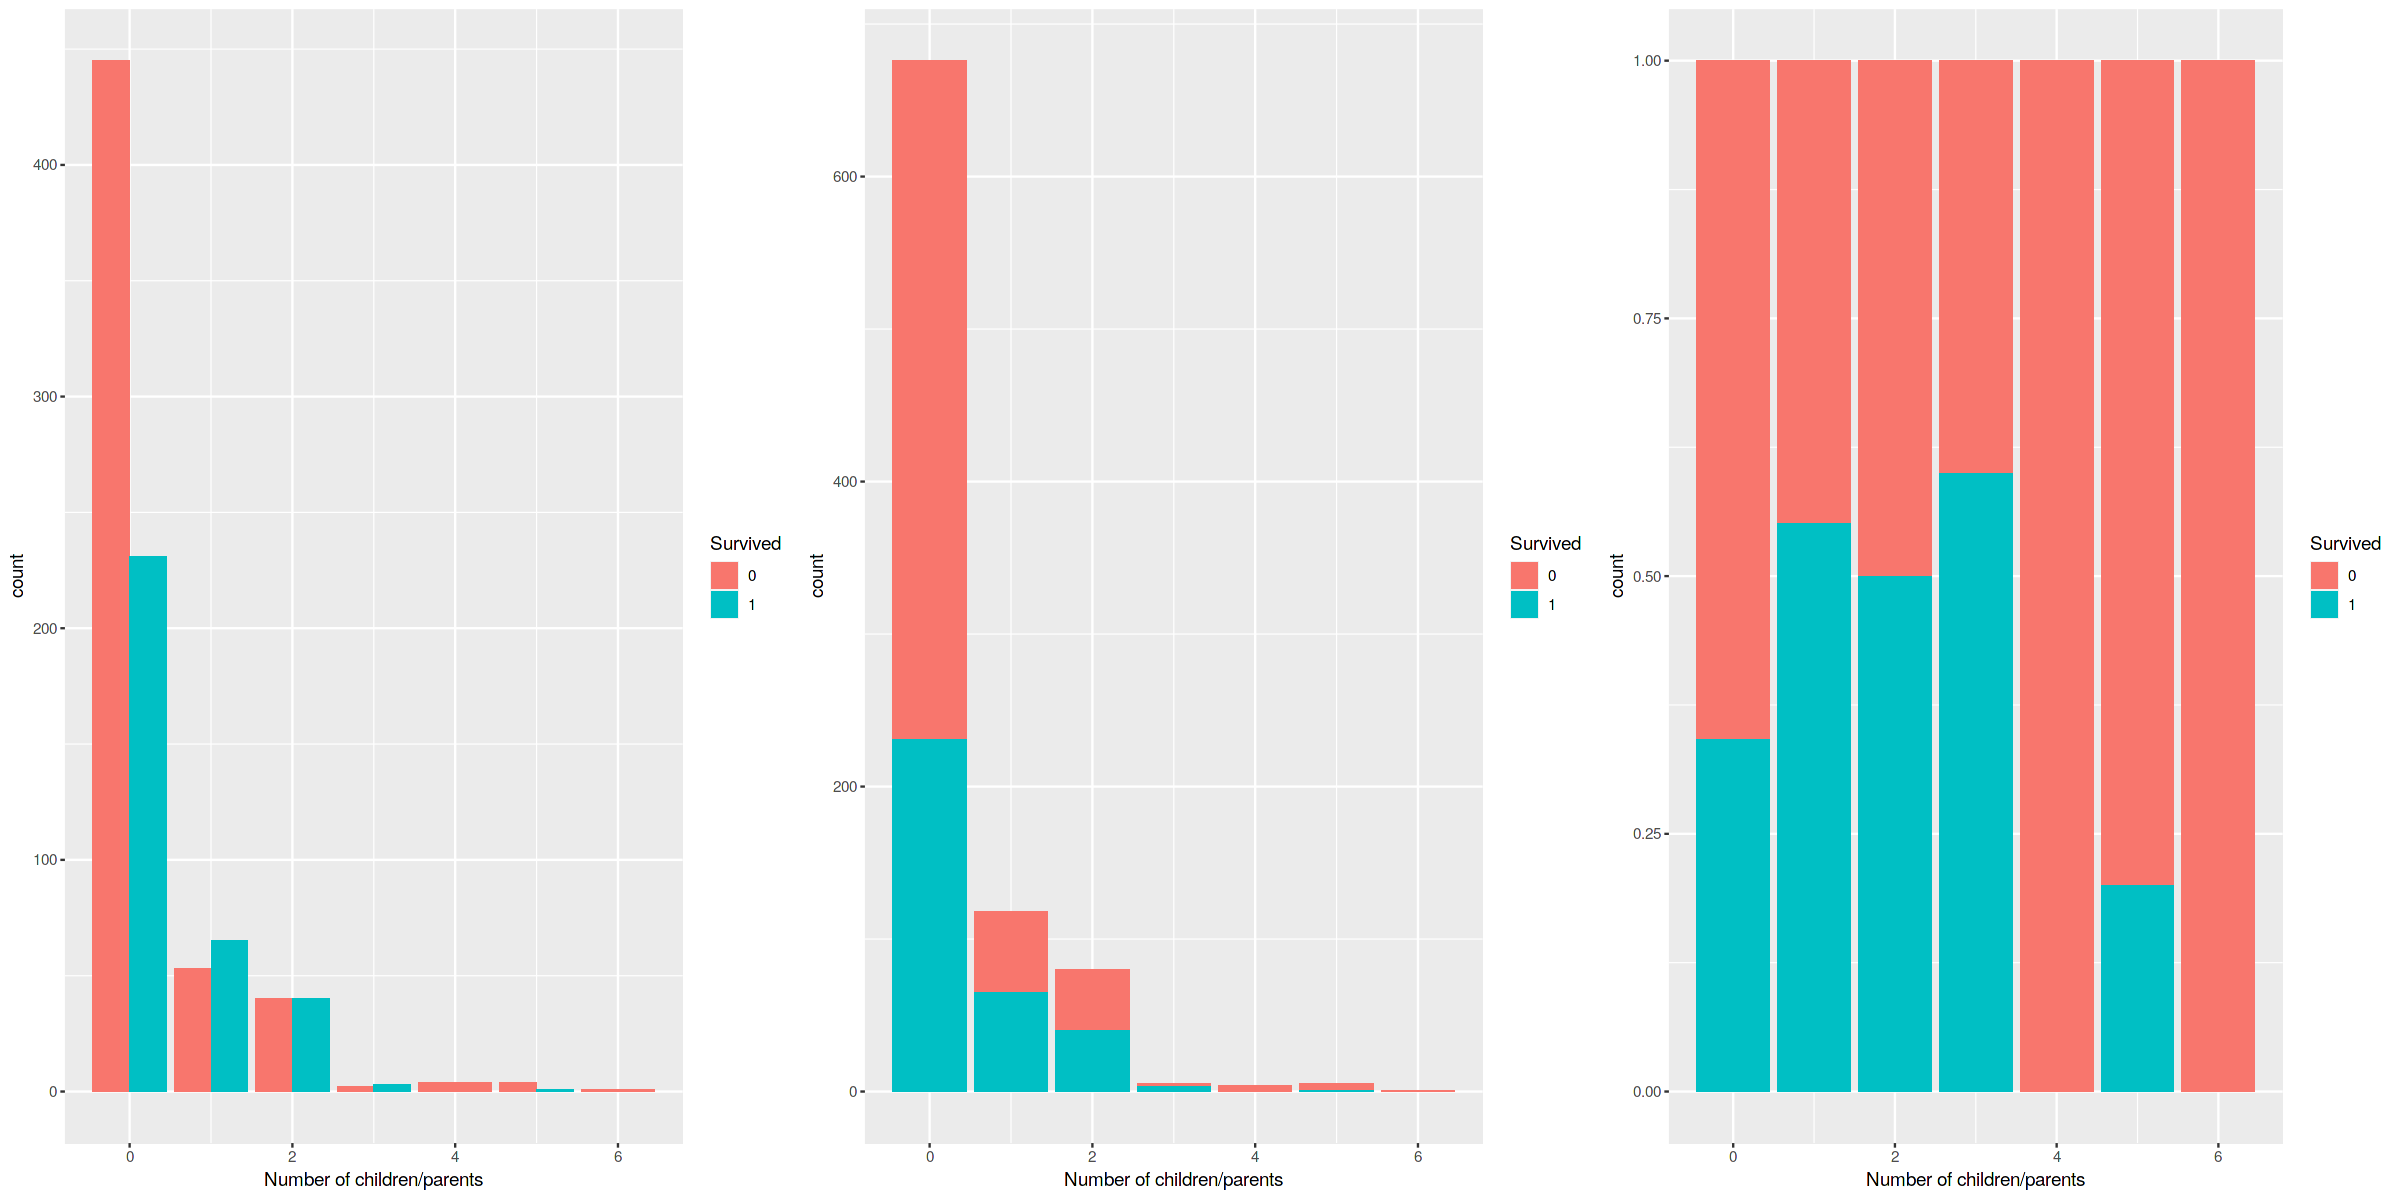

In [12]:
# Analysing Survival Data according to number of parents or children aboard the ship
bar_Parch = Processed_train_data %>%
    ggplot(aes(x=Parch,fill=factor(Survived)))+
    geom_bar(position='dodge')+
    labs(x='Number of children/parents',fill='Survived')

bar_Parch_Stacked = Processed_train_data %>%
    ggplot(aes(x=Parch,fill=factor(Survived)))+
    geom_bar(position='stack')+
    labs(x='Number of children/parents',fill='Survived')

bar_Parch_Ratio = Processed_train_data %>%
    ggplot(aes(x=Parch,fill=factor(Survived)))+
    geom_bar(position='fill')+
    labs(x='Number of children/parents',fill='Survived')

options(repr.plot.width=20,repr.plot.height=10)

grid.arrange(bar_Parch,bar_Parch_Stacked,bar_Parch_Ratio,ncol=3)

# Preliminary Analysis Conclusions

### The analysis of Sex and Ticket Class indicate that most passengers (in the sample) were male and had a ticket class 3. Ratio-wise, the number of males who survived were significantly higher than the number of females that survived; similarly, the number of passengers with ticket class of 3 survived more often.

### The analysis of Number of Children/Parents, the number of siblings and Departure location had many values for one particular variable and few of others. (0,0 and Southhampton). It doesn't seem to have a large influence on the survival of an individual.

# Building the Model

## The output of the model is categorical. this suggests that our model must be a classification model. I chose K-means classification to perform the predictions.

In [13]:
# Partitioning the training data into a separate 'training' and 'testing'
set.seed(2020)
training_rows = Processed_train_data %>%
    select(Survived)%>%
    unlist()%>%
    createDataPartition(p=0.75,list=FALSE)

training_set = Processed_train_data %>%
    slice(training_rows)

testing_set = Processed_train_data %>%
    slice(-training_rows)

In [14]:
# Scaling the data for a classification model
scale_transformer <- preProcess(training_set, method = c("center", "scale")) # Always use the training set for scaling
training_set <- predict(scale_transformer, training_set)
testing_set <- predict(scale_transformer, testing_set) 

In [15]:
# Creating predictor variables and output variables
X_train = training_set %>%
    select(Pclass,sex_n,Cabin_Data,Embarked_n) %>%
    data.frame()

Y_train = training_set %>%
    select(Survived) %>%
    unlist()

X_test = testing_set %>%
    select(Pclass,sex_n,Cabin_Data,Embarked_n) %>%
    data.frame() 

Y_test = testing_set %>%
    select(Survived) %>%
    unlist()


In [16]:
# Performing cross validation with different values of k
train_control <- trainControl(method="cv", number = 10) # Number of chunks/folds = 5, method = cross validation
set.seed(1234)
ks = data.frame(k = seq(from = 1, to = 51, by = 2)) # A sequence of K values
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = ks, trControl = train_control)

In [17]:
# chosing the k with the highest accuracy
best_knn_value <- knn_model_cv_10fold$results %>%
    filter(Accuracy == max(Accuracy)) %>% # Selects row with Max Accuracy
    select(k) %>% # Pulls that K value with its accuracy into vector
    pull() 

best_knn_value

[1] 17

# Using cross validation, we have found that 17 is the best value of k for classification. 

## We will now use this value of k to build the classification model.

In [18]:
# Training a knn model with the k that yields the highest accuracy
k = data.frame(k = best_knn_value)
knn_model_best <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

knn_model_best$results

,k,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,0.7846804,0.5161246,0.02664167,0.05597387


## We have constructed a model with a training accuracy of 0.78

## We will use this model to predict values of the untouched data from the training data; this will give us an idea of how well the model will perform on new data.

In [19]:
# Using the model to predict the data from the in sample test data
Y_test_predicted <- predict(object = knn_model_best, X_test) # Predicting "Y" which are the classifiers

# Finding the accuracy of our prediction
model_quality <- confusionMatrix(data = Y_test_predicted, reference = Y_test) # Used to get stats of quality of model
model_quality$overall[1] # Returns Accuracy Column

Accuracy 
0.8333333

## The accuracy of the predictions on the untouched data is 0.83

# We will now perform the predictions on the TRUE Test Data; we will not know the accuracy of the predictions on the new data as we do not have access to the true predicted values.

## We will store the predictions and the passenger Id's in a new dataframe and save it as a csv.

In [20]:
#Now we will predict the data from the ACTUAL TEST DATA

#scaling the true data
True_test <- predict(scale_transformer, Processed_test_data) 

X_True_test = True_test %>%
    select(Pclass,sex_n,Cabin_Data,Embarked_n) %>%
    data.frame()

Y_true_test_predicted <- predict(object = knn_model_best, X_True_test) # Predicting "Y" which are the classifiers




In [21]:
passid = Processed_test_data$PassengerId

final = data.frame(PassengerId = passid,Survived = Y_true_test_predicted)%>%
    as_data_frame

Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [22]:
write.csv(final,"my_submission.csv")